# Write your own Stochastic Gradient Descent code, first step 

In [65]:
'''
OLS grad => (2/len(yi))*xi.T @((xi @ theta) - yi)
Ridge grad => (2/len(yi))*xi.T @ (xi @ (theta)-yi)+2*lmbda*theta
'''

def learning_schedule(t):
    return t0/(t + t1)

def SGD(xi,yi,theta,eta,lmbda = 0.001):
    #grad = (2/len(yi))*xi.T @((xi @ theta) - yi)
    grad = (2/len(yi))*xi.T @ (xi @ (theta)-yi)+2*lmbda*theta
    theta = theta - eta*grad 
    return theta

def SGDmomentum(xi,yi,theta,eta,momentum=0.9,lmbda=0.001):
    vt = np.zeros((xi.shape[1],yi.shape[1]))
    #gt = 2*xi.T @((xi @ theta) - yi)
    gt = (2/len(yi))*xi.T @ (xi @ (theta)-yi)+2*lmbda*theta
    vt = momentum*vt + eta*gt
    theta = theta - vt
    return theta

def RMSprop(xi,yi,theta,st,eta=1e-3,beta=0.9,eps=1e-8,lmbda = 0.001):
    #gt = 2*xi.T @((xi @ theta) - yi)
    gt = (2/len(yi))*xi.T @ (xi @ (theta)-yi)+2*lmbda*theta
    st = beta*st + (1-beta)*gt*gt
    theta = theta - eta*gt/(np.sqrt(st + eps))
    return theta, st

def ADAM(xi,yi,theta,t,mt,st,eta,beta1=0.90,beta2=0.99,eps=1e-7,lmbda = 0.001):
    #gt = 2*xi.T @((xi @ theta) - yi)
    gt = (2/len(yi))*xi.T @ (xi @ (theta)-yi)+2*lmbda*theta
    mt = beta1*mt + (1-beta1)*gt
    st = beta2*st + (1-beta2)*gt*gt 
    mt = mt/(1-beta1**t)
    st = st/(1-beta2**t)
    theta = theta - eta*mt/(np.sqrt(st)+eps)
    return theta, mt, st

In [66]:
import numpy as np 
from sklearn.utils import resample

# Stochastic Gradient Descent 

n = 300 # num of data points 
x = 2*np.random.randn(n,1)
y = 4+3*x + np.random.randn(n,1)
X = np.zeros((n,2))

X[:,0] = 1 
X[:,1] = x.flatten()

theta = np.random.randn(2,1)



n_epochs = 1000
M = 1 # size of each minibatch 
m = int(n/M) # num of minibatches 

t0, t1 = 5, 50

# initialization
mt = np.zeros((2,1))
st = np.zeros((2,1))
t = 0  

# shuffle the data 
X, y = resample(X,y)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        
        eta = learning_schedule(epoch*m + i)
        t = t + 1
        #theta = SGDmomentum(xi,yi,theta,eta)
        #theta = SGD(xi,yi,theta,eta)
        #theta, st = RMSprop(xi,yi,theta,st,eta)
        theta, mt, st = ADAM(xi,yi,theta,t,mt,st,eta)

print(theta)

[[4.04922431]
 [2.99900843]]


# Part g: Write your Logistic Regression, final step 

In [182]:
import matplotlib.pyplot as plt 
def skl_minmaxscaler(X):
    from sklearn.preprocessing import MinMaxScaler
    X_scaled = MinMaxScaler().fit_transform(X)
    return X_scaled

def sigmoid(beta,X):
    assert beta.shape[0]==X.shape[1]
    t = X @ beta
    p = np.exp(t)/(1+np.exp(t))
    return p 

def LG(xi,yi,theta,epoch,eta=1e-3):
    p = sigmoid(theta,xi)
    b = -xi.T @ (yi - p)
    theta = theta - eta*b 
    return theta


In [201]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split 
cancer = load_breast_cancer()
import pandas as pd

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
X_train = skl_minmaxscaler(X_train)
X_test = skl_minmaxscaler(X_test)

intercept_train = np.ones(X_train.shape[0])[:,np.newaxis]
intercept_test = np.ones(X_test.shape[0])[:,np.newaxis]
X_train = np.concatenate((intercept_train,X_train),axis=1)
X_test = np.concatenate((intercept_test,X_test),axis=1)

assert np.max(X_train)-1 < 1e-9
assert np.min(X_train) < 1e-9 


theta = np.random.randn(X_train.shape[1],1)

n_epochs = 100000
M = 100         # size of each minibatch 
m = int(n/M)    # num of minibatches 

t0, t1 = 5, 50

# initialization
mt = np.zeros((2,1))
st = np.zeros((2,1))
t = 0  

# shuffle data
X, y = resample(X_train,y_train) 

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M][:,np.newaxis]
        
        eta = learning_schedule(epoch*m + i)
        t = t + 1
        theta = LG(xi,yi,theta,epoch,eta)

# calculate y_pred
y_raw = X_test @ theta
y_pred = []
for i in range(len(y_raw)):
    if y_raw[i:i+1] >= 0:
        y_pred.append(1)
    elif y_raw[i:i+1] < 0:
        y_pred.append(0)
        
# Calculate accuracy 
accuracy = np.mean(y_pred == y_test)
print(accuracy)

0.8601398601398601


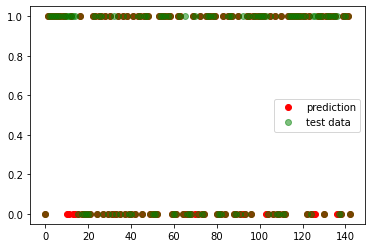

In [189]:
plt.plot(y_pred,'ro',label='prediction')
plt.plot(y_test,'go',alpha=0.5,label='test data')
plt.legend()

# Benchmarking 

(300, 1)
[[-7.10530016]
 [ 1.53190878]
 [-2.11194797]]
0.9866666666666667


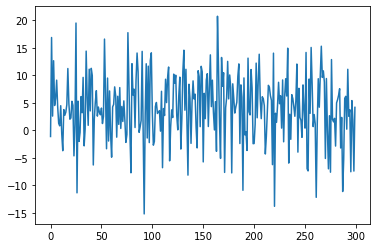

In [161]:
import numpy as np 
from sklearn.utils import resample

# Stochastic Gradient Descent 

n = 300 # num of data points 
x = 2*np.random.randn(n,1)
y = 4+3*x + 0.1*np.random.randn(n,1)
plt.plot(y)
y = np.array([1 if yy>17 else 0 for yy in y])[:,np.newaxis]
print(y.shape)
X = np.zeros((n,2))

X[:,0] = 1 
X[:,1] = x.flatten()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
X_train = skl_minmaxscaler(X_train)
X_test = skl_minmaxscaler(X_test)

intercept_train = np.ones(X_train.shape[0])[:,np.newaxis]
intercept_test = np.ones(X_test.shape[0])[:,np.newaxis]
X_train = np.concatenate((intercept_train,X_train),axis=1)
X_test = np.concatenate((intercept_test,X_test),axis=1)

theta = np.random.randn(X_train.shape[1],1)



n_epochs = 10000
M = 20 # size of each minibatch 
m = int(n/M) # num of minibatches 

t0, t1 = 5, 50

# initialization
mt = np.zeros((X_train.shape[1],1))
st = np.zeros((X_train.shape[1],1))
t = 0  

# shuffle the data 
X, y = resample(X_train,y_train)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        
        eta = learning_schedule(epoch*m + i)
        theta = LG(xi,yi,theta,epoch,eta=1e-3)

print(theta)
# calculate y_pred
y_raw = X_test @ theta
y_pred = []
for i in range(len(y_raw)):
    if y_raw[i:i+1] > 0:
        y_pred.append(1)
    elif y_raw[i:i+1] <= 0:
        y_pred.append(0)

# calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(accuracy)

# Part h: Support Vector Machine